In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [51]:
def cat2vars(cat):
    lst = np.array(cat[:,0],dtype='float64')*24./(2.*np.pi)
    filename = cat[:,1]
    filesamp = np.array(cat[:,2],dtype='int') # Sample number within the file
    jd = np.array(cat[:,3],dtype='float64')
    return {'lst':lst,'filename':filename,'filesamp':filesamp,'jd':jd}

In [53]:
cat7548 = cat2vars(np.load('LST_catalog_2457548.npz')['cat'])
cat7549 = cat2vars(np.load('LST_catalog_2457549.npz')['cat'])
catsim = cat2vars(np.load('LST_catalog_simulation.npz')['cat'])

<IPython.core.display.Javascript object>


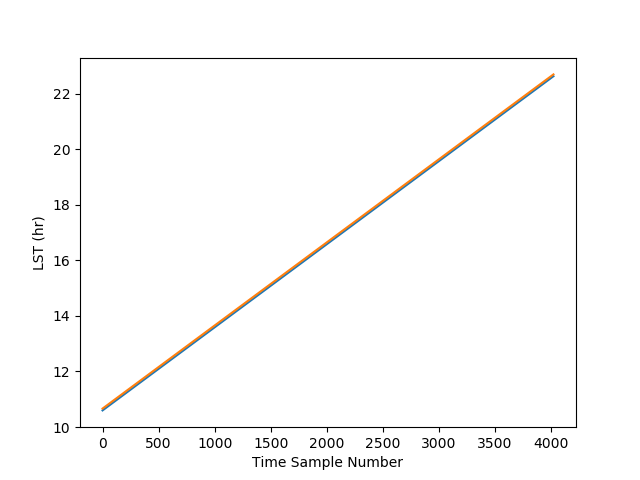

In [42]:
plt.figure()
plt.clf()
plt.plot(cat7548['lst'])
plt.plot(cat7549['lst'])
plt.xlabel('Time Sample Number')
plt.ylabel('LST (hr)')
plt.show()

<IPython.core.display.Javascript object>


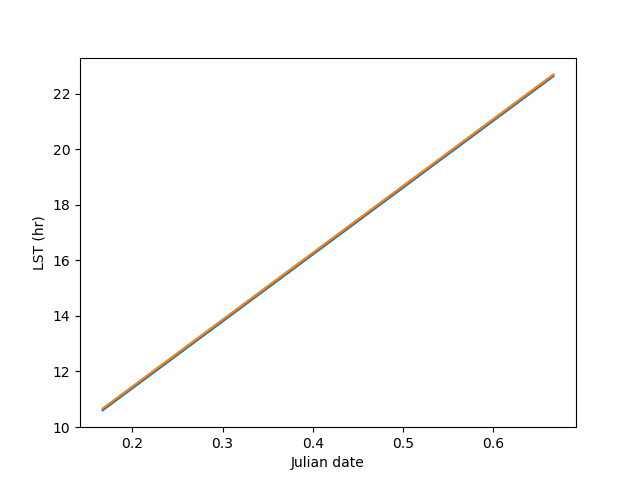

In [45]:
plt.figure()
plt.clf()
plt.plot(cat7548['jd']-2457548,cat7548['lst'])
plt.plot(cat7549['jd']-2457549,cat7549['lst'])
plt.xlabel('Julian date')
plt.ylabel('LST (hr)')
plt.show()

<IPython.core.display.Javascript object>


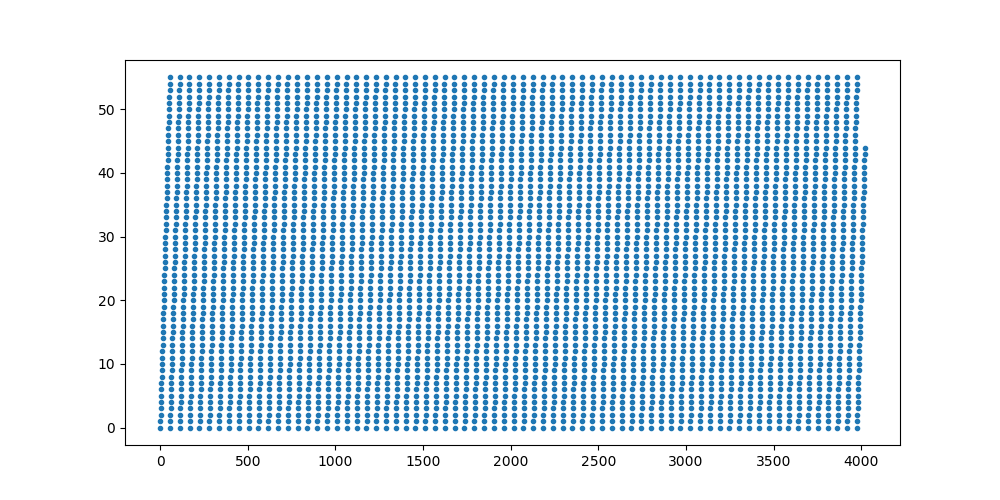

In [49]:
plt.figure(figsize=(10,5))
plt.clf()
plt.plot(cat7548['filesamp'],'.')
plt.show()

<IPython.core.display.Javascript object>


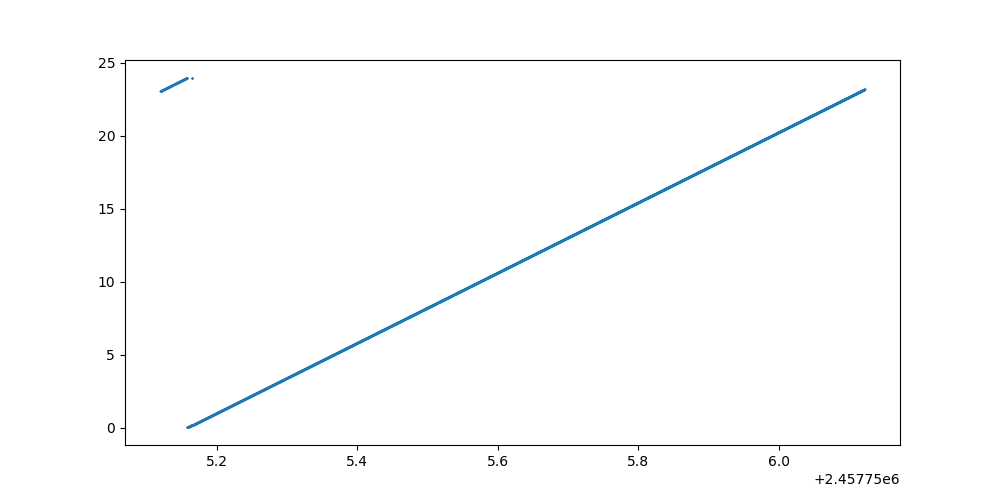

In [65]:
plt.figure(figsize=(10,5))
plt.clf()
plt.scatter(catsim['jd'],catsim['lst'],s=0.1)
plt.show()

In [82]:
# How do we find the nearest simulated data to a real data point?
wh = 1200
print cat7548['lst'][wh]
print cat7548['jd'][wh]
print cat7548['filename'][wh]
print cat7548['filesamp'][wh]
def find_nearest(v,v0):
    return np.argmin(np.abs(v-v0))

14.1882818458
2457548.31607
zen.2457548.31309.xx.HH.uvc
24


In [77]:
match = find_nearest(catsim['lst'],cat7548['lst'][wh])
print match
print catsim['lst'][match]
print (catsim['lst'][match] - cat7548['lst'][wh])*3600

5046
14.1879424733
-1.22174096238


In [78]:
print(catsim['filename'][match])

2457755.74264.xx


In [79]:
print(catsim['filesamp'][match])

44


<IPython.core.display.Javascript object>


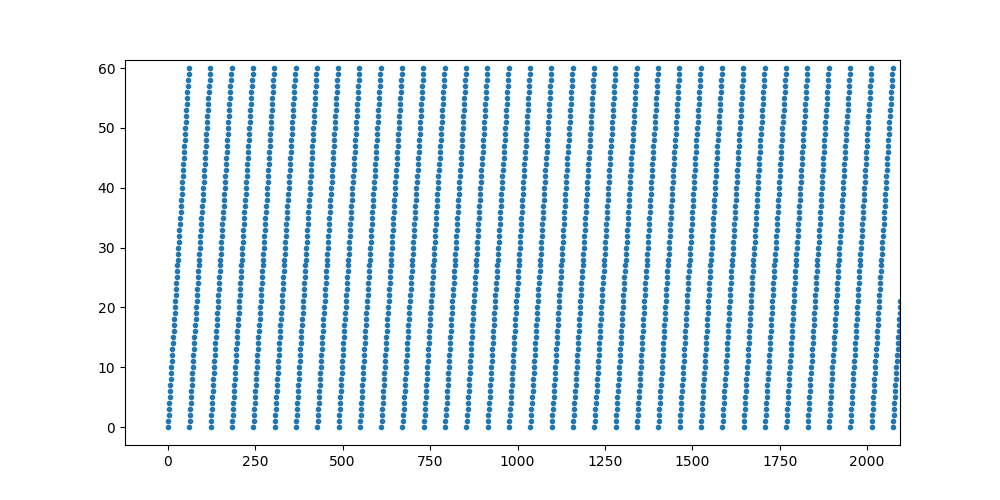

In [81]:
plt.figure(figsize=(10,5))
plt.clf()
plt.plot(catsim['filesamp'],'.')
plt.show()